In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
# To compute and analyze basic statistical measures for numerical columns in the dataset. 
summary_stats = df.describe()
print(summary_stats)

           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max   

High Variability: The high standard deviations in Avg Price, Total Sales Value, 
Discount Amount, and Net Sales Value suggest that the dataset includes a wide range of transaction types,
from low-value to high-value sales. 

Price and Sales: The average price and sales values indicate that the dataset likely includes both low-cost and high-cost items, contributing to a diverse sales profile. 

Discounts: The range of discount rates and amounts shows a significant use of discounts, which vary substantially across transactions. 

Volume of Sales: The variability in sales volume indicates that some transactions involve a single unit, while others involve multiple units, reflecting different sales scenarios (e.g., wholesale vs. retail). 

In [16]:
# List of numerical columns
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value'] 

sns.set(style="whitegrid")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the names of the categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


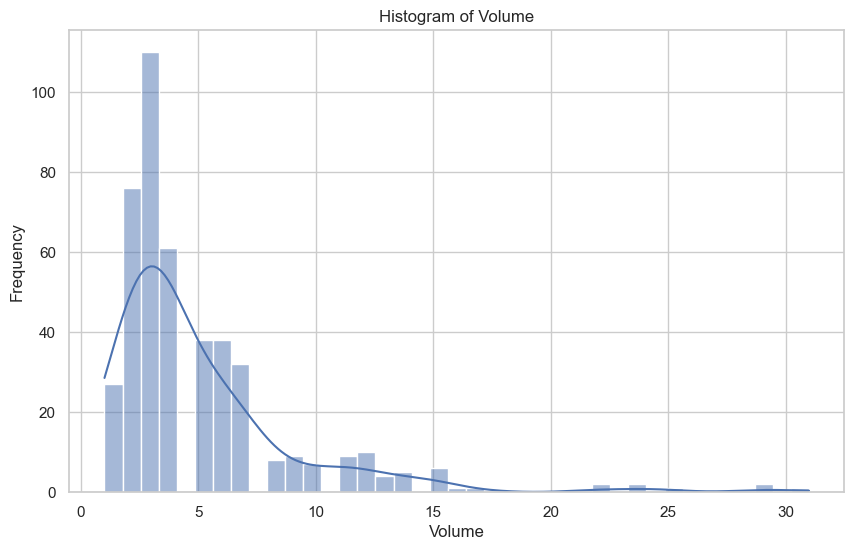

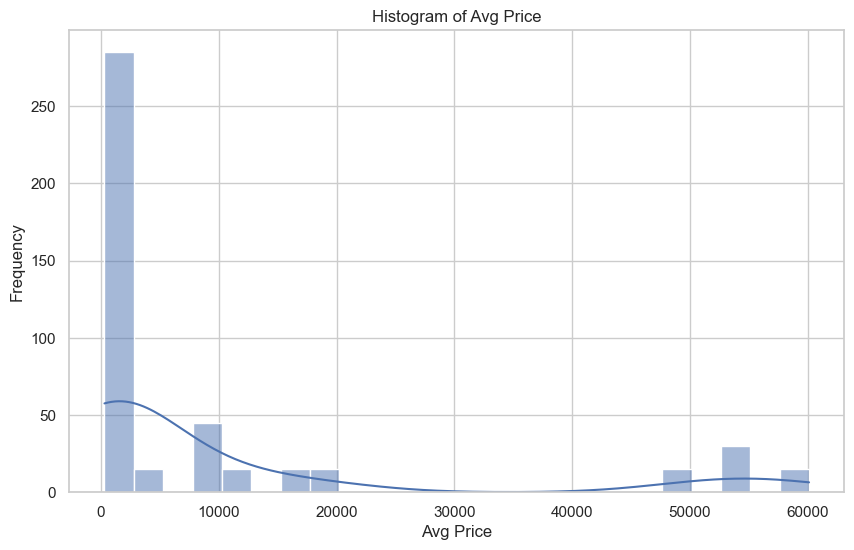

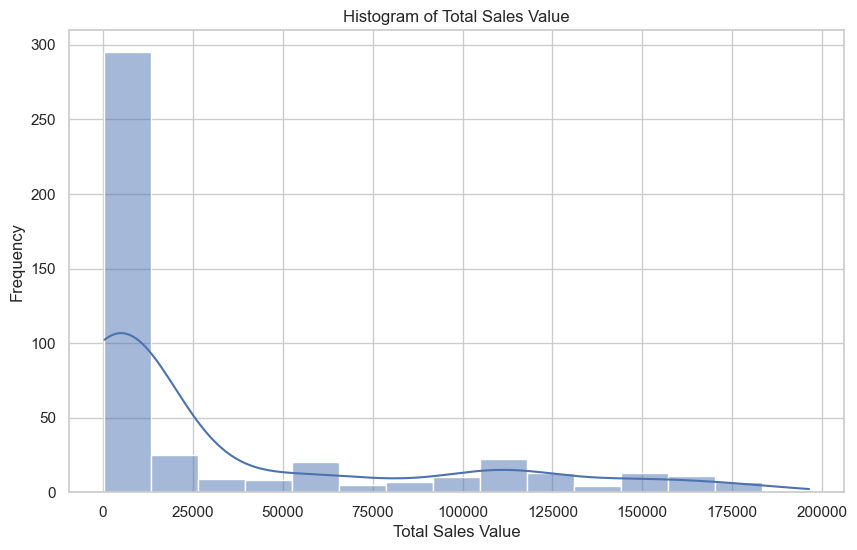

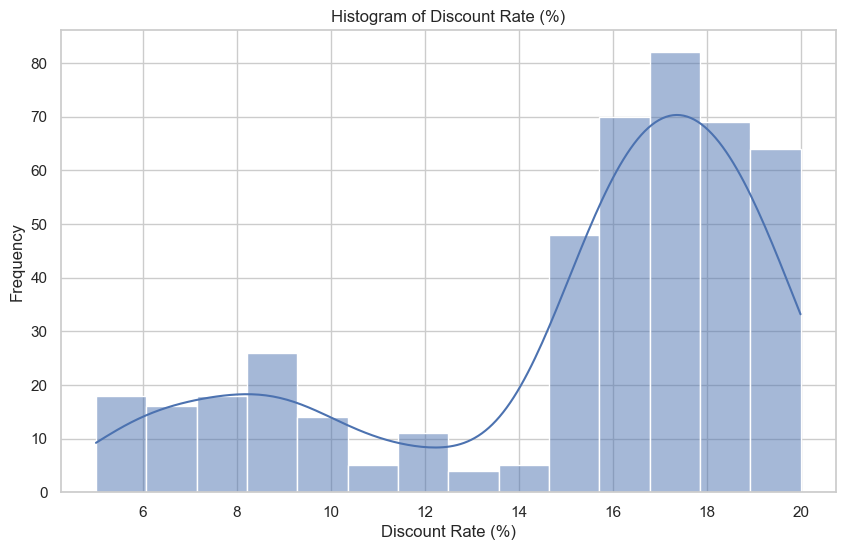

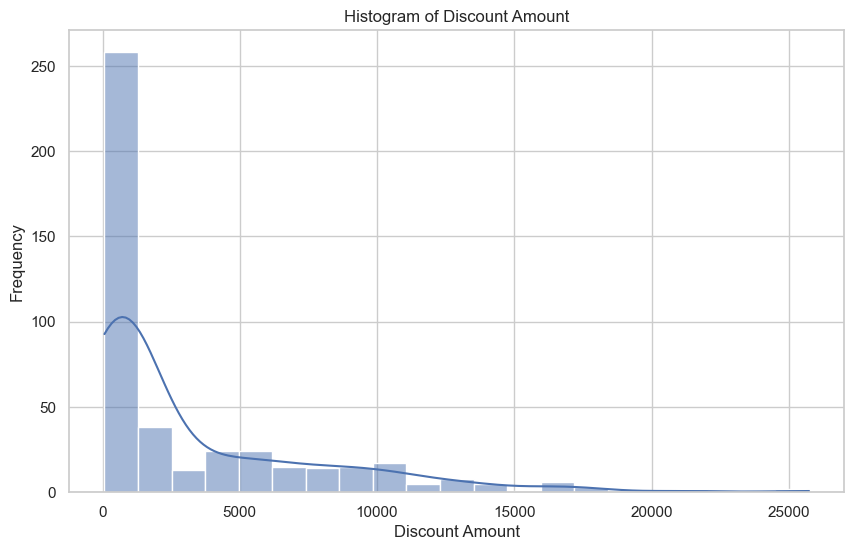

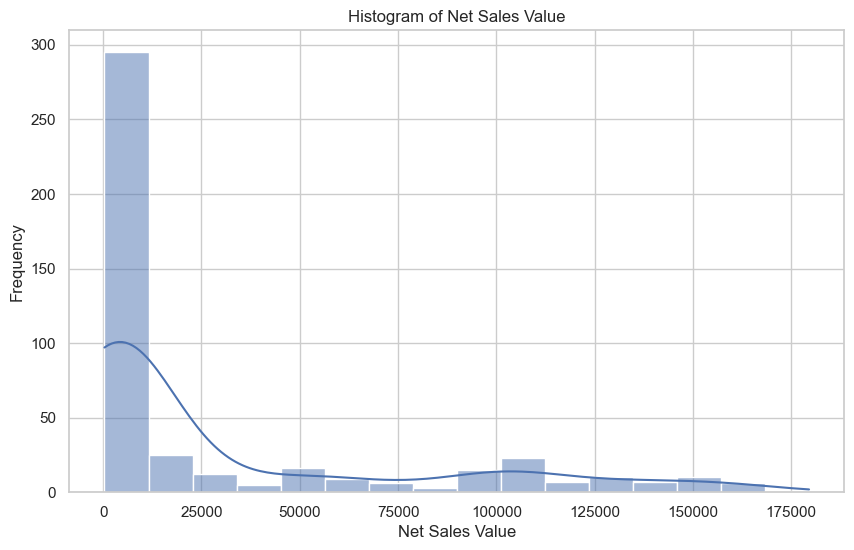

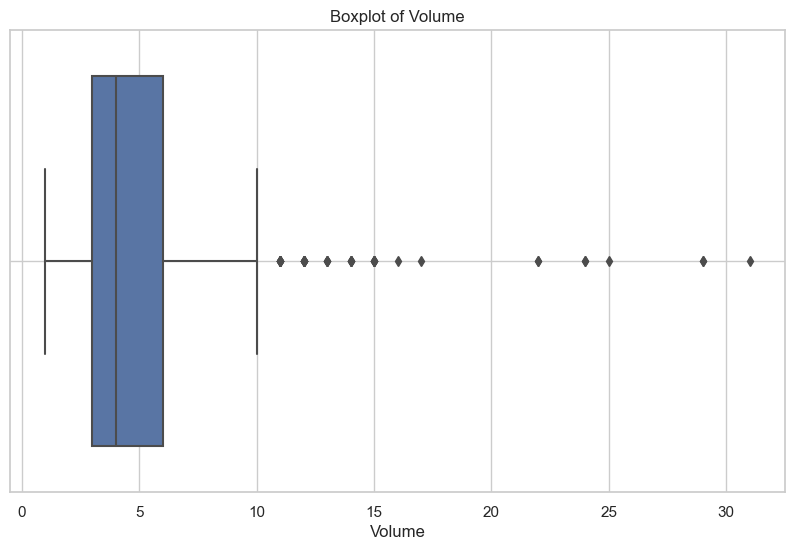

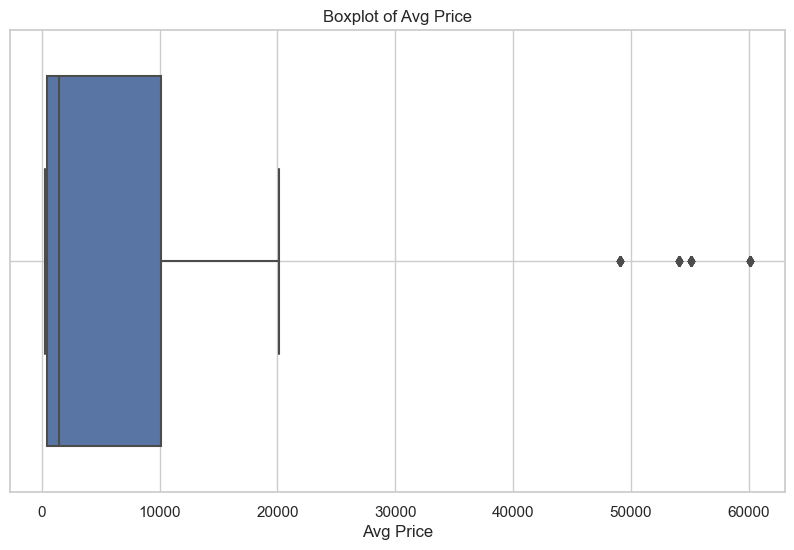

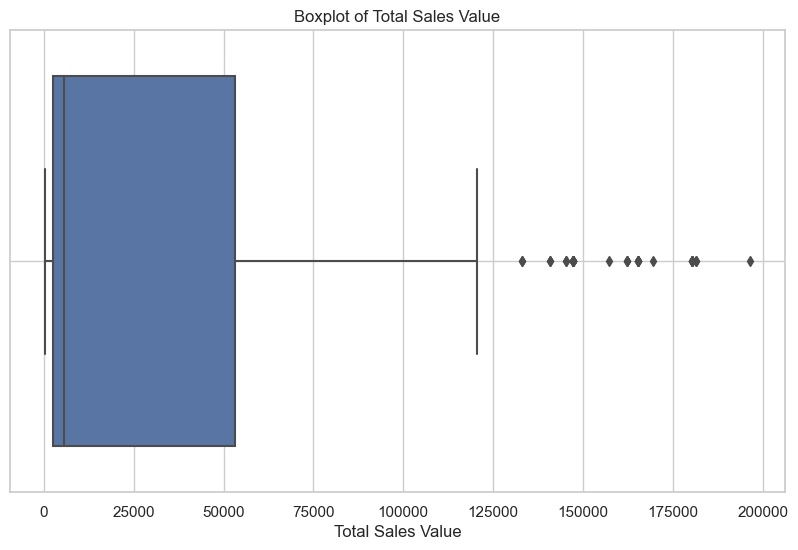

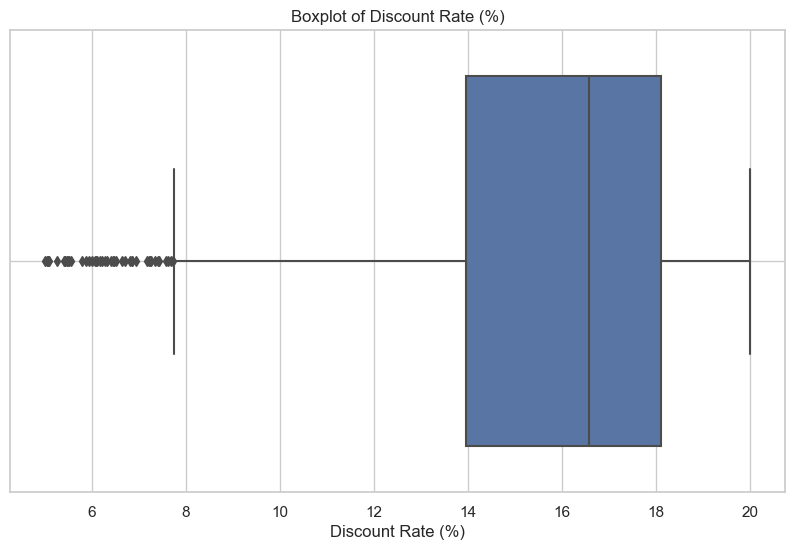

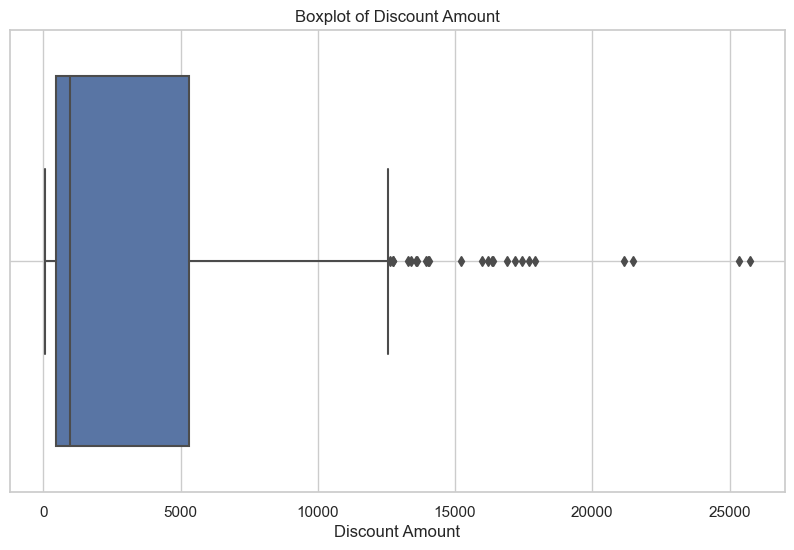

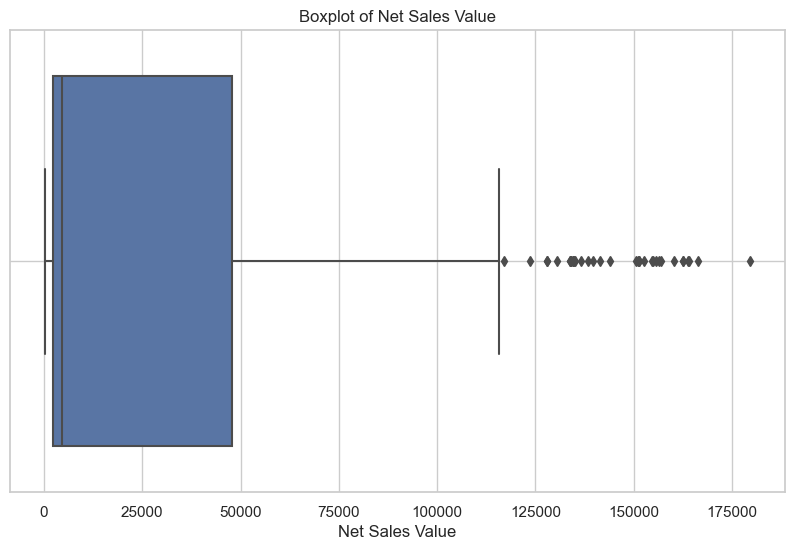

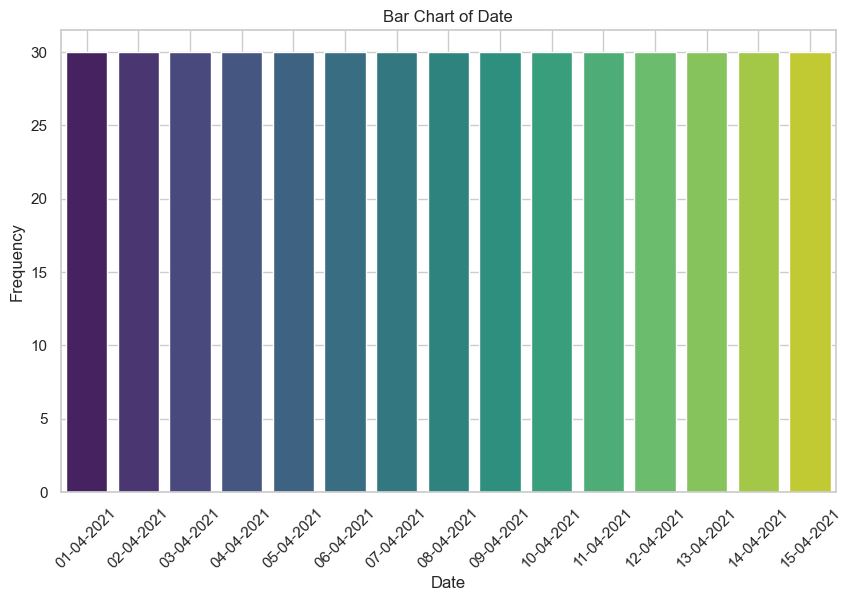

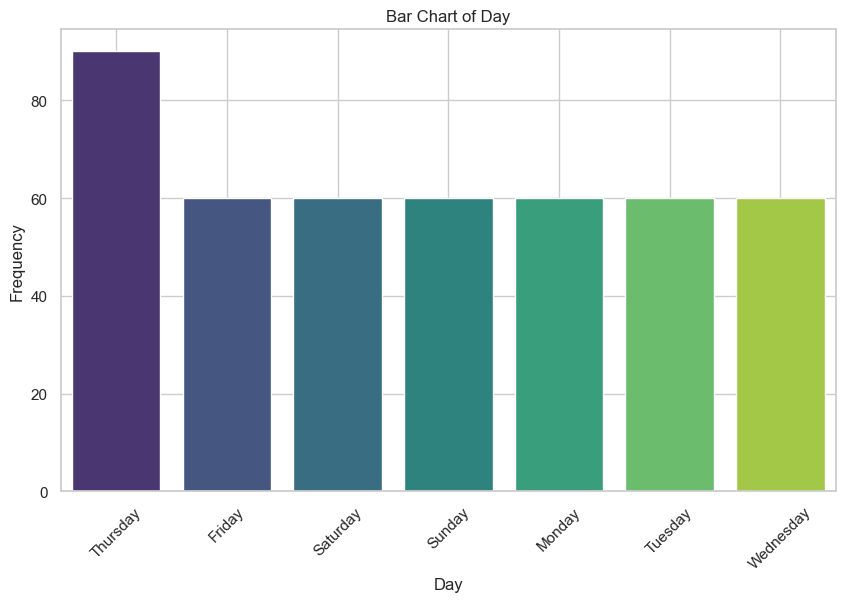

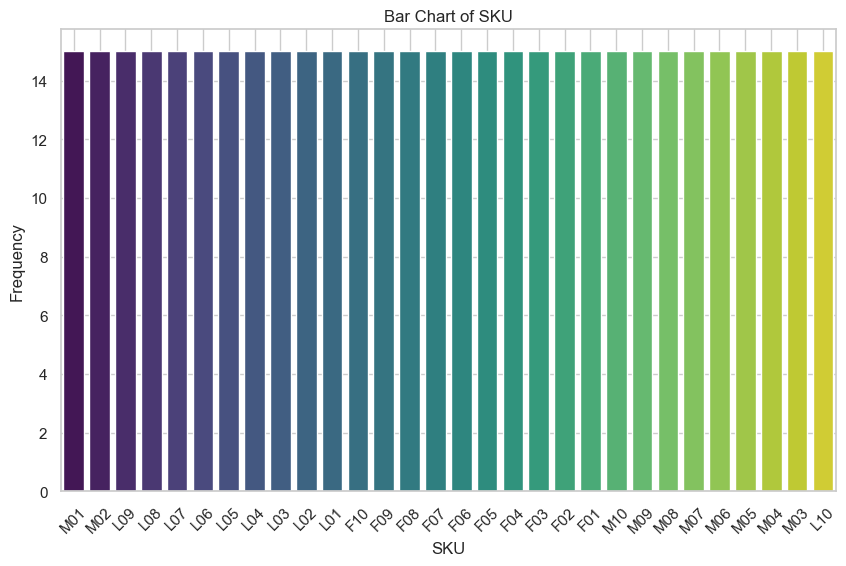

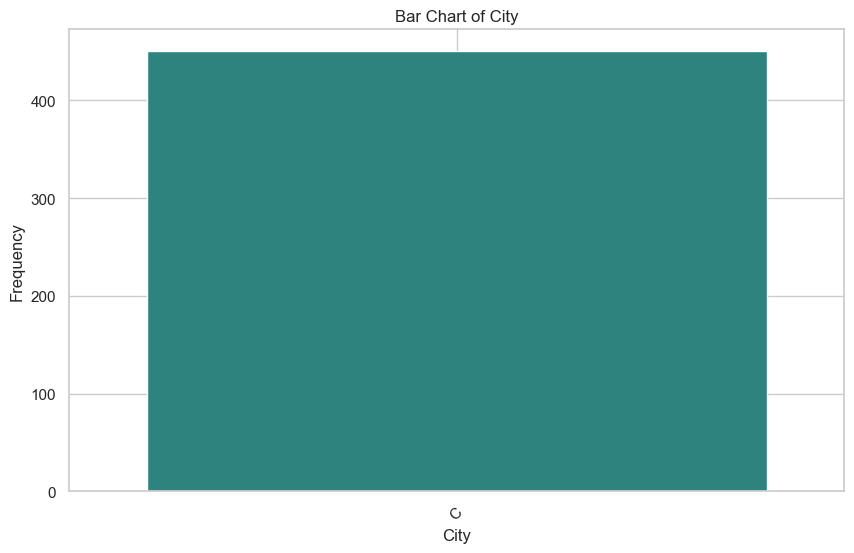

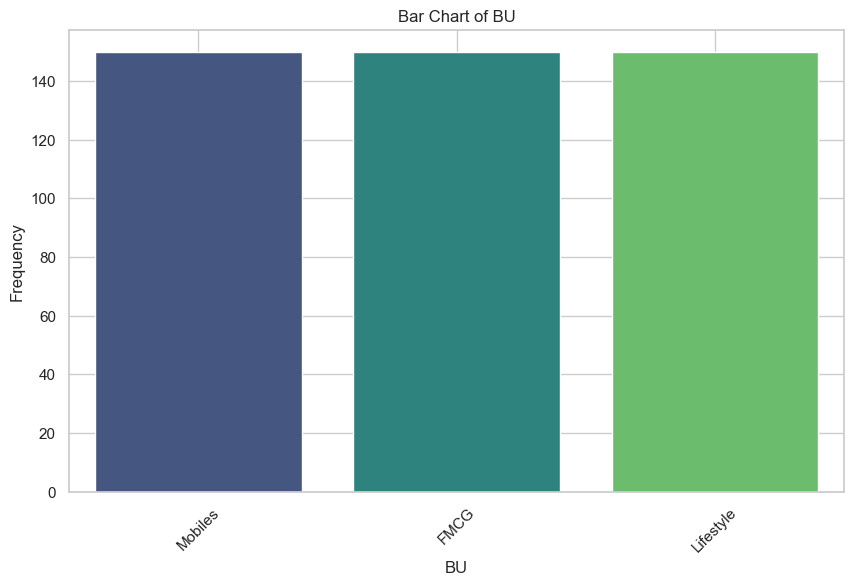

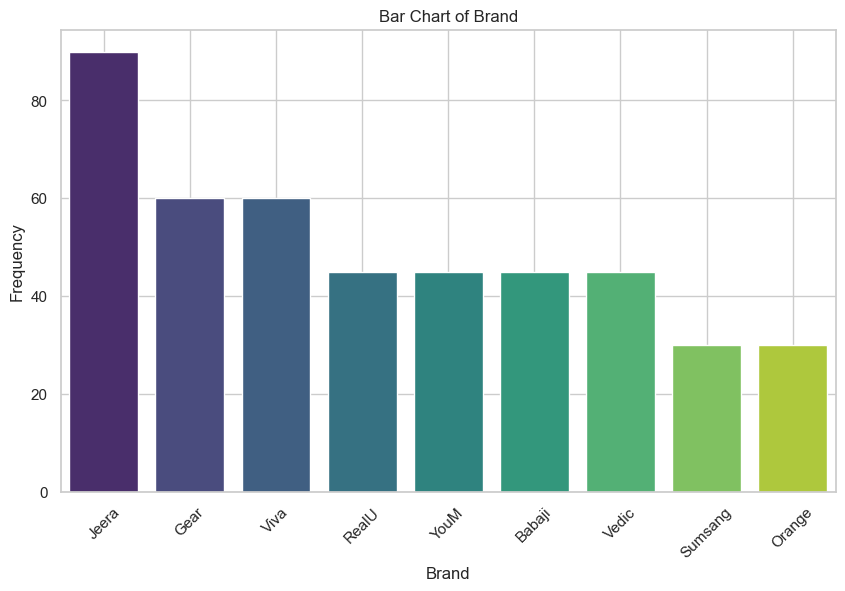

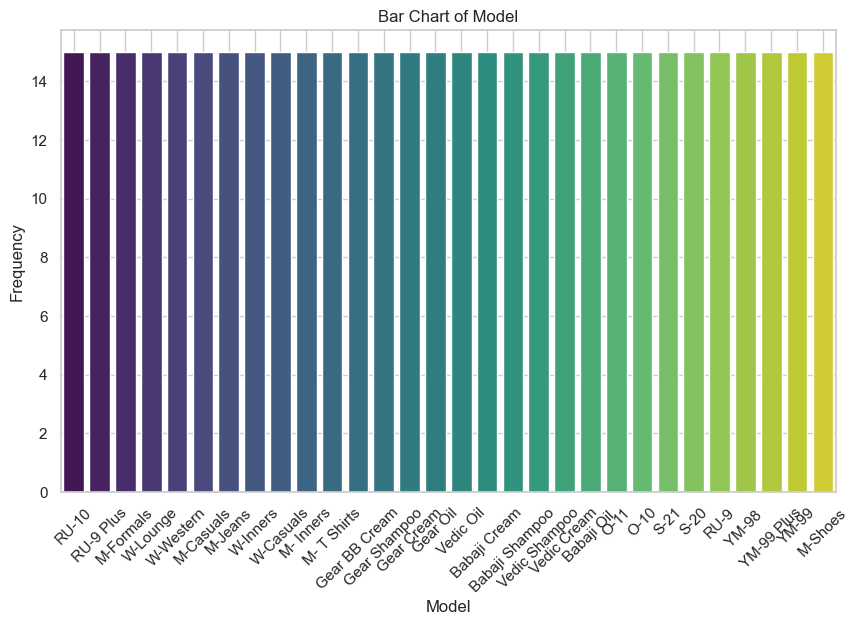

In [17]:
# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot boxplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Plot bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  
    plt.grid(True)
    plt.show()

Avg Price:

Mean: 10453.43, Median: 1450.00, Standard Deviation: 18079.90.
Distribution: Positively skewed with several high-value outliers.
Insights: Indicates that while most items are priced lower, there are some high-priced items that skew the average.

Total Sales Value:
Mean: 33812.84, Median: 5700.00, Standard Deviation: 50535.07.
Distribution: Positively skewed with some high-value outliers.
Insights: Most sales values are relatively low, but there are some transactions with very high sales values.

Discount Rate (%):
Mean: 15.16, Median: 16.58, Standard Deviation: 4.22.
Distribution: Negatively skewed with outliers on the lower end.
Insights: Majority of discounts are around the mean, with some significantly lower discounts.

Discount Amount:
Mean: 3346.50, Median: 988.93, Standard Deviation: 4509.90.
Distribution: Positively skewed with some high-value outliers.
Insights: Most discounts are lower in value, with a few high discount amounts.

Net Sales Value:
Mean: 30466.34, Median: 4677.79, Standard Deviation: 46358.66.
Distribution: Positively skewed with several high-value outliers.
Insights: Indicates that while most net sales values are low, there are some high values that increase the average.
    
Overall Observations: Data Visualizations: 

Histograms: Showed the skewness and presence of outliers in numerical data. 

Boxplots: Highlighted the range, interquartile range, and outliers for each numerical variable. 

Bar Charts: Visualized the frequency of categories in categorical columns, 
revealing insights into the distribution and prevalence of different categories. 

 

#Right-Skewed Distributions: Most of the numerical columns (Volume, Avg Price, Total Sales Value, Discount Amount, Net Sales Value) are right-skewed. 
This suggests that while the majority of the data points are on the lower end, a few high values are skewing the distributions. 

#Left-Skewed Distribution: The Discount Rate (%) is left-skewed, indicating that higher discount rates are more common, 
with fewer instances of low discount rates. 

#Outliers: A significant number of outliers are present across all columns, indicating variability and potential anomalies in the data. These outliers can heavily influence statistical measures and should be carefully examined. 

#Concept of Standardization (z-score normalization): 

Standardization transforms data to have a mean of zero and a standard deviation of one. This is particularly useful when the data has different units or different scales. 

The formula for standardization is: 
z=x−μ/σ
-𝑥 is the original value 
-𝜇 is the mean of the column 
-σ is the standard deviation of the column 

After standardization, the values represent the number of standard deviations away from the mean. 

             Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  4.500000e+02  4.500000e+02       4.500000e+02       4.500000e+02   
mean   4.934325e-17  3.947460e-17       1.184238e-17      -3.552714e-17   
std    1.000000e+00  1.000000e+00       1.000000e+00       1.000000e+00   
min   -9.610229e-01 -5.621398e-01      -6.611811e-01      -2.404259e+00   
25%   -4.883887e-01 -5.524605e-01      -6.156681e-01      -2.819928e-01   
50%   -2.520716e-01 -4.979801e-01      -5.563034e-01       3.370428e-01   
75%    2.205626e-01 -1.954841e-02       3.836378e-01       7.011977e-01   
max    6.128490e+00  2.745953e+00       3.217313e+00       1.146084e+00   

       Discount Amount  Net Sales Value  
count     4.500000e+02     4.500000e+02  
mean     -5.921189e-17     3.947460e-18  
std       1.000000e+00     1.000000e+00  
min      -7.266945e-01    -6.501345e-01  
25%      -6.399340e-01    -6.096839e-01  
50%      -5.227531e-01    -5.562833e-01  
75%       4.368156e-01     3.7

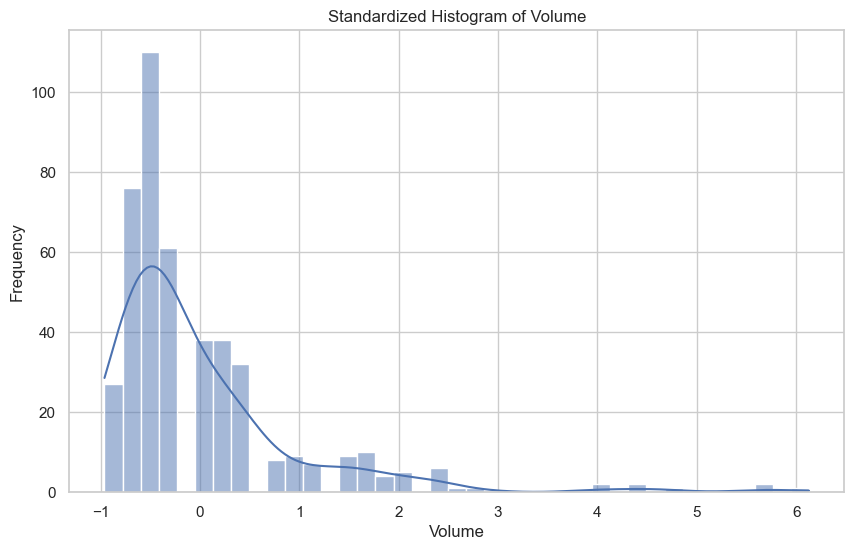

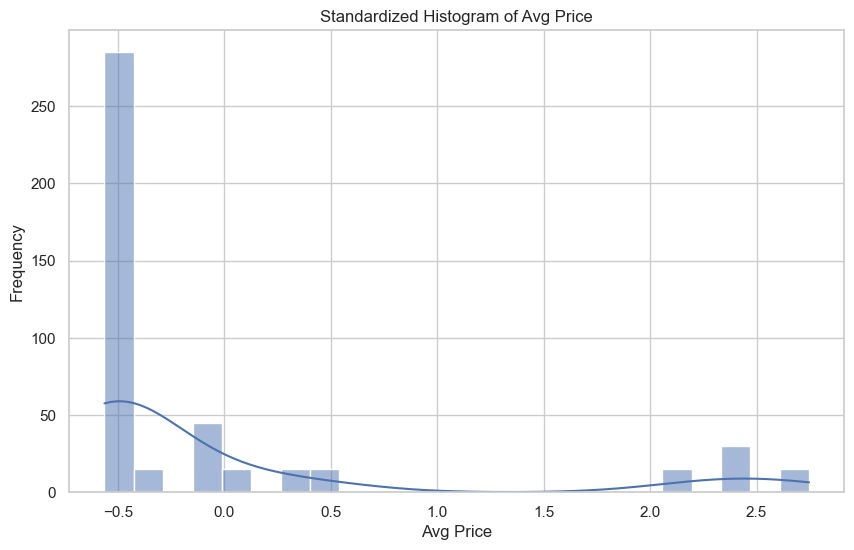

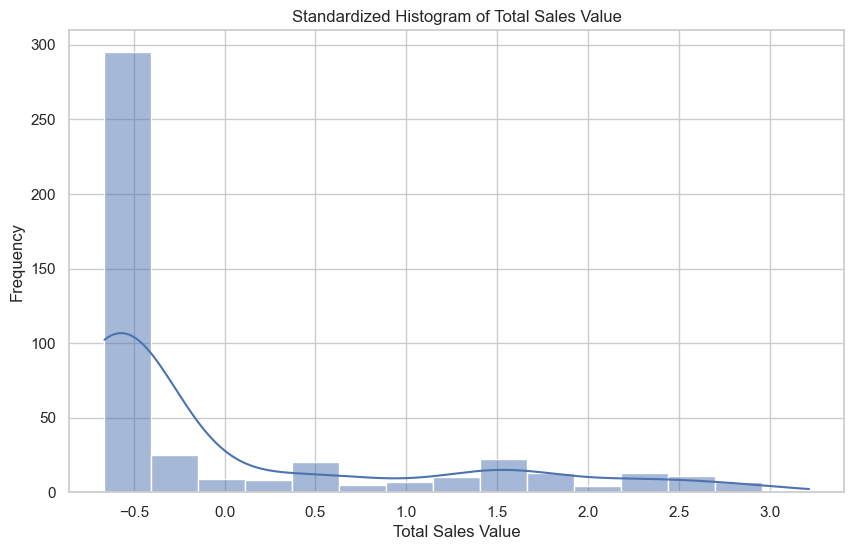

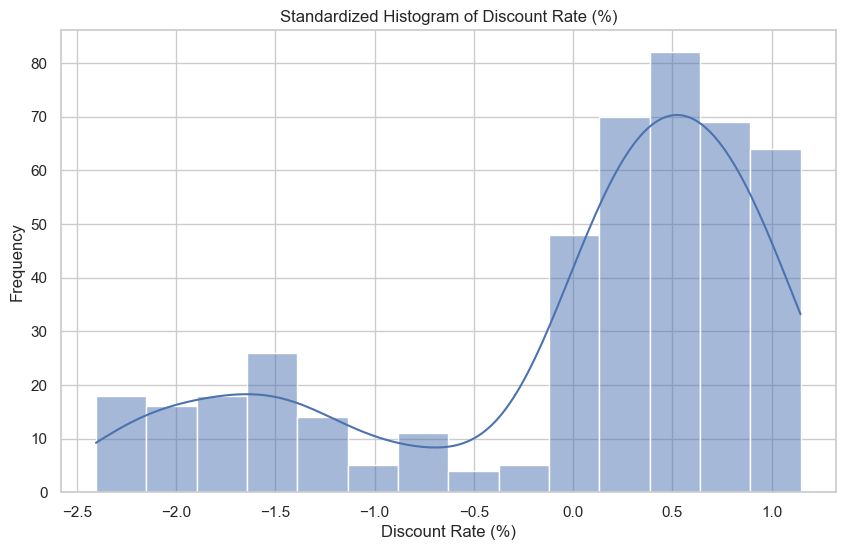

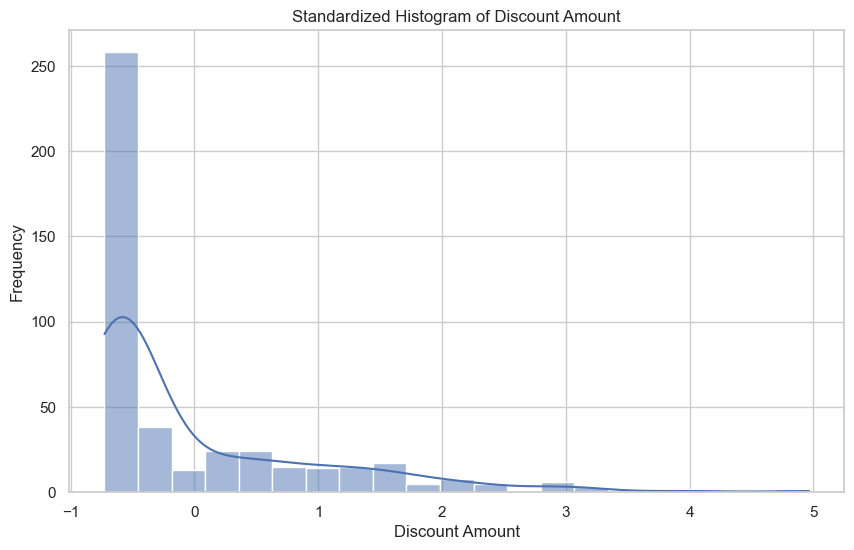

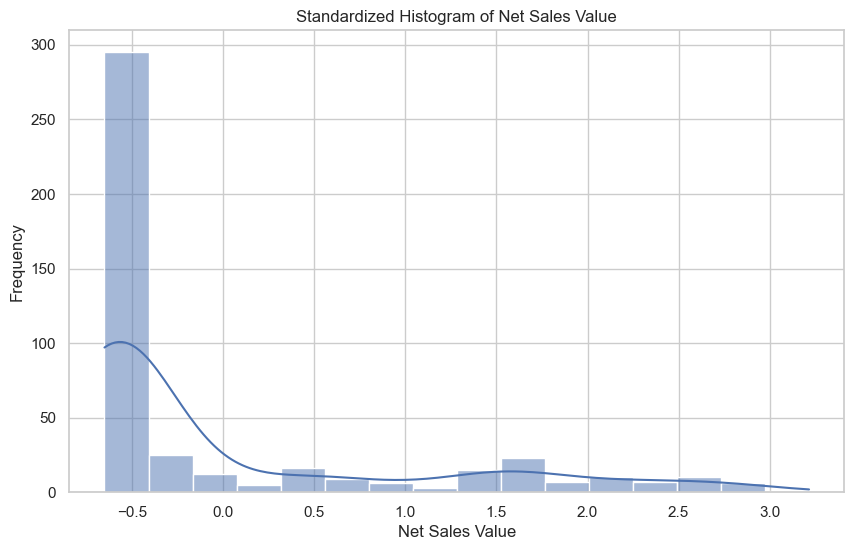

In [21]:
# Standardize the numerical columns
df_standardized = df.copy()
for col in numerical_columns:
    mean = df[col].mean()
    std = df[col].std()
    df_standardized[col] = (df[col] - mean) / std

# Display before and after comparison
print(df_standardized[numerical_columns].describe())

# Plot histograms of the standardized data
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_standardized[col], kde=True)
    plt.title(f'Standardized Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



Before Standardization 

-Volume: 

Distribution: Positively skewed with many values clustered around lower volumes and fewer higher volume values. 

Outliers: Presence of several outliers on the higher end. 

 -Avg Price: 

Distribution: Right-skewed, indicating more lower price values and fewer high price values. 

Outliers: Significant outliers at the high end. 

-Total Sales Value: 

Distribution: Right-skewed, with a majority of lower sales values and some higher values. 

Outliers: Some extreme values indicating high total sales. 

-Discount Rate (%): 

Distribution: Left-skewed, meaning more higher discount rates and fewer lower rates. 

Outliers: Presence of outliers with lower discount rates. 

-Discount Amount: 

Distribution: Right-skewed, showing more lower discount amounts and fewer high discount amounts. 

Outliers: Presence of high discount amounts as outliers. 

-Net Sales Value: 

Distribution: Right-skewed, indicating more lower net sales values and fewer higher values. 

Outliers: Presence of high net sales values as outliers. 


After Standardization 

-Volume: 

Distribution: Centred around zero with a standard deviation of one. 

Shape: Maintains the same shape (right-skewed) but scaled to a standardized form. 

-Avg Price: 

Distribution: Centered around zero, maintaining the same skewness. 

Shape: Right-skewed, scaled appropriately. 

-Total Sales Value: 

Distribution: Centered around zero, keeping the right-skewed shape. 

Shape: The original shape is preserved but standardized. 

-Discount Rate (%): 

Distribution: Centered around zero, maintaining left-skewness. 

Shape: The original left-skewed shape is standardized. 

-Discount Amount: 

Distribution: Centered around zero with the original right-skewed shape. 

Shape: Preserves the original distribution but standardized. 

-Net Sales Value: 

Distribution: Centered around zero, maintaining right-skewed distribution 
Shape: Original shape preserved in a standardized form.          

Summary: 

Standardization transforms the numerical columns to have a mean of zero and a standard deviation of one. This transformation helps to: 

Make the data suitable for many machine learning algorithms that assume a standard distribution of inputs. 

Improve the performance and convergence rate of gradient descent-based algorithms. 

Insights: 

The skewness and presence of outliers remain after standardization. However, the data is now on a uniform scale, which is beneficial for many analytical models. 

Further preprocessing (e.g., log transformation, handling outliers) might be necessary depending on the specific requirements of your analysis or machine learning model. 

 

In [24]:
#Conversion of Categorical Data into Dummy Variables 
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display a portion of the transformed dataset
print(df_encoded.head())



   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180                0                0                0   
1     89323.897039                0                0                0   
2    102042.089843                0                0                0   
3    112235.925298                0                0                0   
4     19927.053770                0                0                0   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0                0  ...

#Importance of Data Preprocessing Steps:
Standardization:

Purpose: To bring all numerical features onto a similar scale, ensuring that no feature dominates because of its scale.
Benefits:
Improves the performance and convergence speed of gradient-based algorithms.
Helps in achieving better model performance by treating all features equally.
One-Hot Encoding:

Purpose: To convert categorical variables into a numerical format that machine learning algorithms can process.
Benefits:
Allows algorithms to interpret categorical data correctly without assuming any ordinal relationship.
Prevents bias towards categories with higher numerical values if label encoding was used.
Summary:
Descriptive analytics and data visualizations provide essential insights into the data's central tendencies,
spread, and distribution. Skewness and outliers were identified, highlighting the need for appropriate preprocessing.

Preprocessing steps like standardization and one-hot encoding are crucial for preparing the data for machine learning models. 
Standardization ensures that numerical features are on a comparable scale, which is vital for the performance of many algorithms.
One-hot encoding transforms categorical variables into a suitable format, avoiding misinterpretation by the algorithms. 
These preprocessing steps improve the data's suitability for analysis, leading to more accurate and reliable model outcomes.